#  WINE QUALITY PREDICTION

# Problem Statement:
 To make use of wine quality data and predict the goodness quality of wine(Supervised learning).

First we start by loading the required Packages

In [66]:
from sklearn.metrics import make_scorer, accuracy_score ,classification_report,f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import sklearn.metrics as sk
from math import sqrt
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os


In [3]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the wine quality data
As observed ,dataset contains 6497 rows and 14 columns conatining different faetures of wine such as acidity,density,alcohol content,residual sugar etc.

In [4]:
#read test and train data
df=pd.read_csv('C:\\Users\\admin\\Downloads\\winequality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,white


# Exploratory data analysis

In [5]:
#identify datatypes of features
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
dtype: object

In [6]:
#statistical analysis
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [7]:
df.groupby('color').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
color,,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415


In [8]:
df.good.value_counts()

0    5220
1    1277
Name: good, dtype: int64

# Data Visualisations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFBE3DCE48>,
      dtype=object)

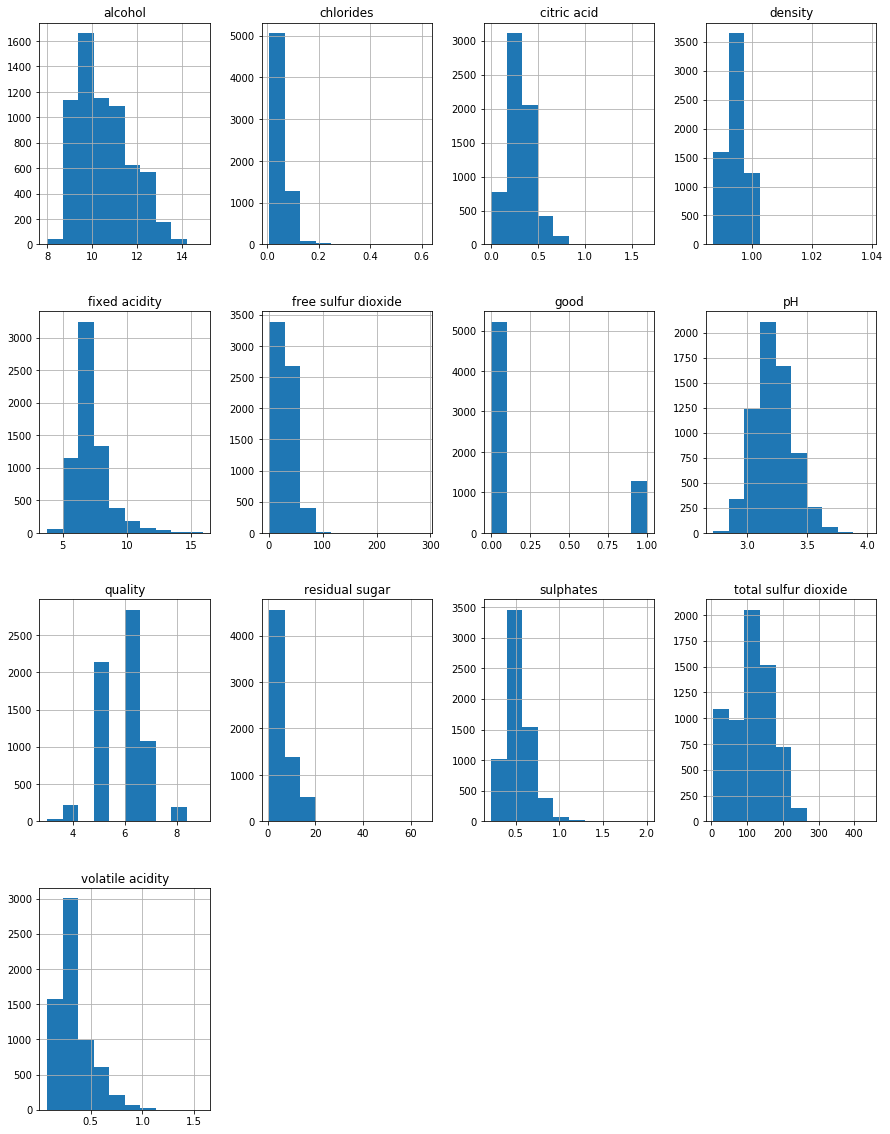

In [9]:
#plotting histogram of all features
df.hist(figsize=(15,20))

Text(0.5, 1.0, 'regression plot of chlorides and quality')

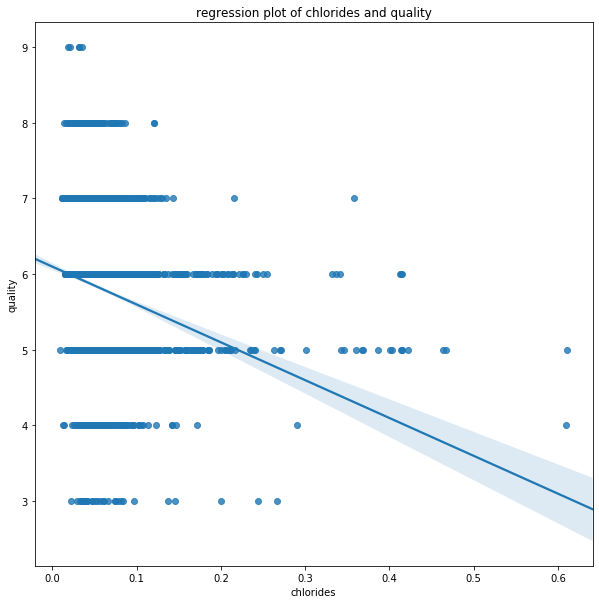

In [10]:
#regression plot of chlorides vs quality
f,ax=plt.subplots(figsize=(10,10))
sns.regplot(x='chlorides',y='quality',data=df)
plt.title('regression plot of chlorides and quality')

observing the above regression plot , the qulaity of the wine is inversely proportional to the presence of chloride content in wine.

Text(0.5, 1.0, 'regression plot of alcohol and quality')

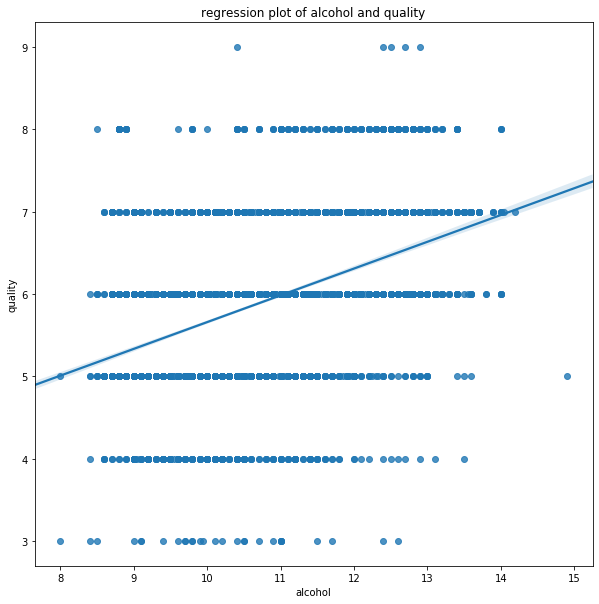

In [11]:
#regression plot of alcohol vs quality
f,ax=plt.subplots(figsize=(10,10))
sns.regplot(x='alcohol',y='quality',data=df)
plt.title('regression plot of alcohol and quality')

observing the above regression plot , the qulaity of the wine is directly proportional to the presence of alcohol content in wine.

Text(0.5, 1, 'countplot of qulaity')

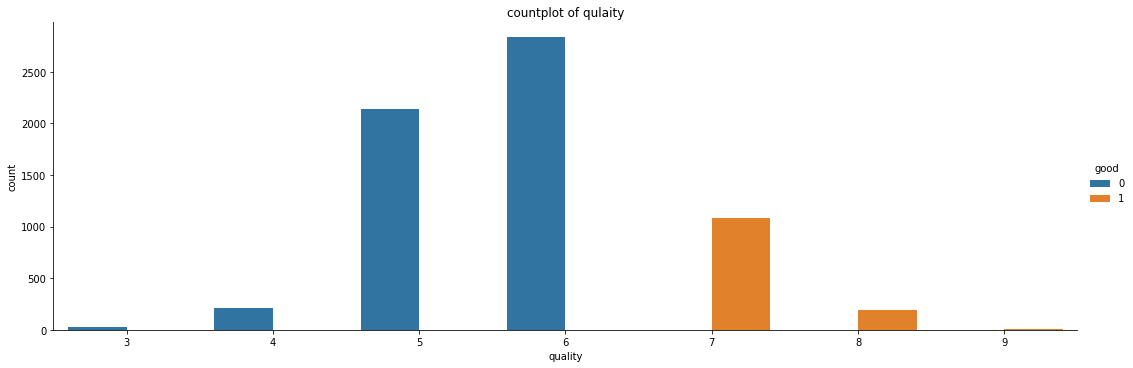

In [12]:
#countplot of quality based on goodness feature
sns.catplot(x='quality',data=df,height=5,aspect=3,hue='good',kind='count')
plt.title('countplot of qulaity')

Based on the above obsevation, it is found that wines that are rated 7 or above are categorised as good. Thus , it makes no logical sense to apply machine learning algorithms here. Just to keep the scope of building ML model alive here, lets remove column 'quality' from the dataset for the sake of predictive analytics.

# Correlation matrix to check multicollinearity

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.033971


Text(0.5, 1, 'heat map')

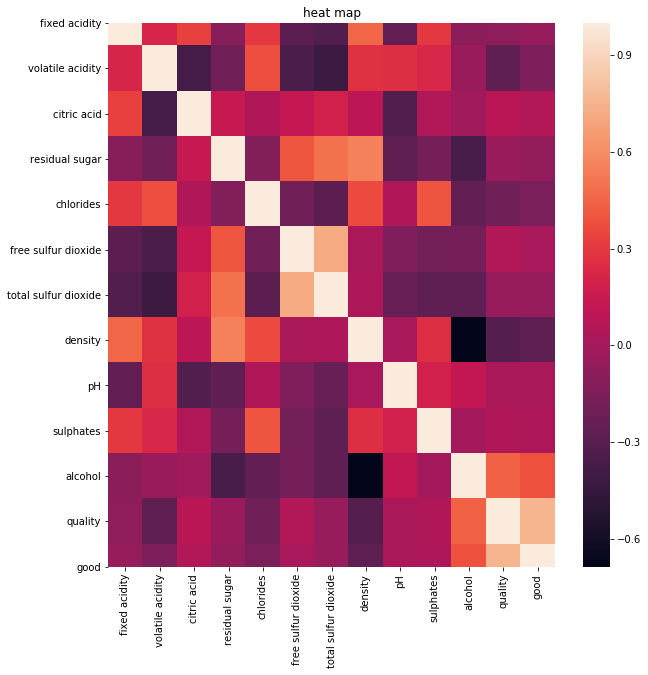

In [13]:
#correltaion matrix/heatmap
df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())
plt.title('heat map')

Observing the heatmap, it is found that 'quality' column is highly correlated to 'good'column as previously determined by countplot. Besides, correlation between 'free sulfur dioxide' and 'total sulfur dioxide' is also high. Thus it is logical to remove one among them to reduce redundancy. Since , 'free sulfur dioxide' is part of the 'total sulfur dioxide' ,lets remove 'free sulfur dioxide'.

In [14]:
#remove unwanted columns
df=df.drop(['quality','free sulfur dioxide'],axis=1)

# check missing values

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
good                    0
color                   0
dtype: int64

There are no missing values.

# Apply one hot encoding to convert categorical columns

In [16]:
#one hot encoding
df=pd.get_dummies(df)

# Separating independant and dependant variables

In [17]:
#creating x and y dataframe
x=df.drop('good',axis=1)
y=df[['good']]

# Create test and train data

In [18]:
#split into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

# Building models with different ML algorithms


#                       Logistic regression model

In [19]:
#perform logistic regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg.predict(x_train)
logreg.predict(x_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Plot roc curve and calculate auc

auc_score for Logistic Regression(train):  0.8050540402797266


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efbf12a988>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(train) - logistic regression')

([<matplotlib.lines.Line2D at 0x1efbf19bec8>],
 [<matplotlib.lines.Line2D at 0x1efbf1a89c8>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

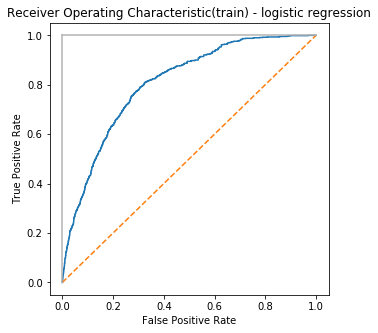

auc_score for Logistic Regression(test):  0.7973069657282223


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efbf854fc8>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(test) - logistic regression')

([<matplotlib.lines.Line2D at 0x1efbf88ad88>],
 [<matplotlib.lines.Line2D at 0x1efbf88c208>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

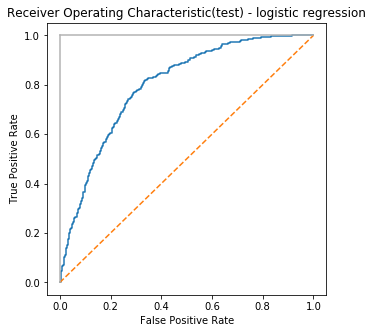

In [20]:
lr_prob=logreg.predict_proba(x_train)
lr_prob=lr_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, lr_prob)
print('auc_score for Logistic Regression(train): ', roc_auc_score(y_train, lr_prob))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - logistic regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


lr_prob_test=logreg.predict_proba(x_test)
lr_prob_test=lr_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, lr_prob_test)
print('auc_score for Logistic Regression(test): ', roc_auc_score(y_test, lr_prob_test))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# confusion matrix, accuracy, f1 score

In [74]:
#accuracy and f1 score
print('train model metrics')
confusion_matrix(y_train,logreg.predict(x_train))
print('accuracy-',round(logreg.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,logreg.predict(x_train)))
print('precision-',sk.precision_score(y_train,logreg.predict(x_train)))
print('recall-',sk.recall_score(y_train,logreg.predict(x_train)))


print('')
print('test model metrics')
confusion_matrix(y_test,logreg.predict(x_test))
print('accuracy-',round(logreg.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,logreg.predict(x_test)))
print('precision-',sk.precision_score(y_test,logreg.predict(x_test)))
print('recall-',sk.recall_score(y_test,logreg.predict(x_test)))



train model metrics


array([[3466,  160],
       [ 697,  224]], dtype=int64)

accuracy- 81.15
f1 score- 0.3432950191570881
precision- 0.5833333333333334
recall- 0.24321389793702497

test model metrics


array([[1528,   66],
       [ 279,   77]], dtype=int64)

accuracy- 82.31
f1 score- 0.30861723446893785
precision- 0.5384615384615384
recall- 0.21629213483146068


#                             Random forest model

In [38]:
# Perform random forest with grid search
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
random = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5).fit(x_train, y_train)
random.predict(x_train)
random.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# plot roc curve and calculate auc

auc_score for random forest(train):  0.9575118893406469


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efbfb3c048>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(train) - random forest')

([<matplotlib.lines.Line2D at 0x1efbfb24908>],
 [<matplotlib.lines.Line2D at 0x1efc91ac7c8>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

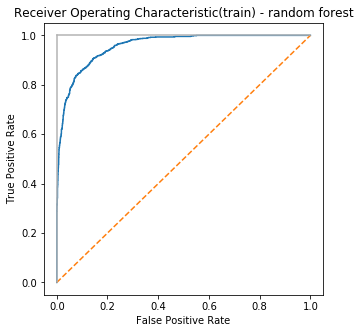

auc_score for random forest(test):  0.8714667362158656


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efc911f308>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(test) - random forest')

([<matplotlib.lines.Line2D at 0x1efbfad13c8>],
 [<matplotlib.lines.Line2D at 0x1efbf99dac8>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

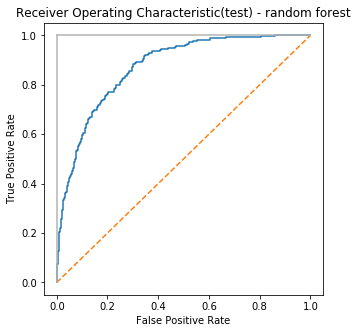

In [39]:
rf_prob=random.predict_proba(x_train)
rf_prob=rf_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, rf_prob)
print('auc_score for random forest(train): ', roc_auc_score(y_train, rf_prob))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - random forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


rf_prob_test=random.predict_proba(x_test)
rf_prob_test=rf_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, rf_prob_test)
print('auc_score for random forest(test): ', roc_auc_score(y_test, rf_prob_test))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - random forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# confusion matrix, accuracy and f1 score

In [75]:
print('train model metrics')
confusion_matrix(y_train,random.predict(x_train))
print('accuracy-',round(random.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,random.predict(x_train)))
print('precision-',sk.precision_score(y_train,random.predict(x_train)))
print('recall-',sk.recall_score(y_train,random.predict(x_train)))
print(" ")
print('test model metrics')
confusion_matrix(y_test,random.predict(x_test))
print('accuracy-',round(random.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,random.predict(x_test)))
print('precision-',sk.precision_score(y_test,random.predict(x_test)))
print('recall-',sk.recall_score(y_test,random.predict(x_test)))



train model metrics


array([[3583,   43],
       [ 402,  519]], dtype=int64)

accuracy- 90.21
f1 score- 0.6999325691166555
precision- 0.9234875444839857
recall- 0.5635179153094463
 
test model metrics


array([[1540,   54],
       [ 227,  129]], dtype=int64)

accuracy- 85.59
f1 score- 0.47866419294990725
precision- 0.7049180327868853
recall- 0.36235955056179775


# decision tree model

In [59]:
#grid search with decision tree
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
dtc=DecisionTreeClassifier()
dt=GridSearchCV(dtc,parameters).fit(x_train,y_train)
dt.predict(x_train)
dt.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# plot roc curve and calculate auc


auc_score for decision tree(train):  0.911522554263364


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efcdff9988>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(train) - decision tree')

([<matplotlib.lines.Line2D at 0x1efce011f08>],
 [<matplotlib.lines.Line2D at 0x1efce01cf08>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

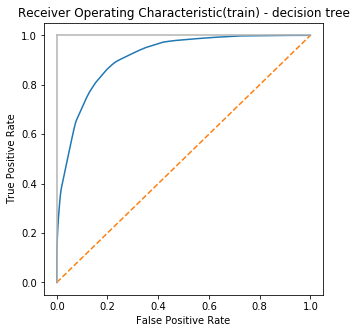

auc_score for decision tree(test):  0.8080477351867255


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efce096808>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(test) - decision tree')

([<matplotlib.lines.Line2D at 0x1efce03af48>],
 [<matplotlib.lines.Line2D at 0x1efce045dc8>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

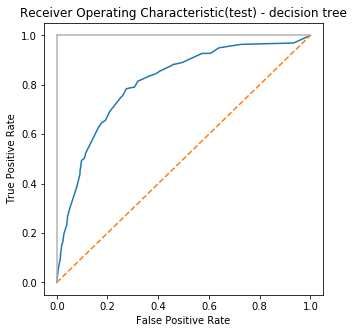

In [60]:
dt_prob=dt.predict_proba(x_train)
dt_prob=dt_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, dt_prob)
print('auc_score for decision tree(train): ', roc_auc_score(y_train, dt_prob))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - decision tree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


dt_prob_test=dt.predict_proba(x_test)
dt_prob_test=dt_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, dt_prob_test)
print('auc_score for decision tree(test): ', roc_auc_score(y_test, dt_prob_test))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - decision tree')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# confusion matrix , accuracy and f1 score

In [77]:
print('train model metrics')
confusion_matrix(y_train,dt.predict(x_train))
print('accuracy-',round(dt.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,dt.predict(x_train)))
print('precision-',sk.precision_score(y_train,dt.predict(x_train)))
print('recall-',sk.recall_score(y_train,dt.predict(x_train)))
print(" ")
print('test model metrics')
confusion_matrix(y_test,dt.predict(x_test))
print('accuracy-',round(dt.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,dt.predict(x_test)))
print('precision-',sk.precision_score(y_test,dt.predict(x_test)))
print('recall-',sk.recall_score(y_test,dt.predict(x_test)))

train model metrics


array([[3361,  265],
       [ 329,  592]], dtype=int64)

accuracy- 86.94
f1 score- 0.6659167604049494
precision- 0.690781796966161
recall- 0.6427795874049945
 
test model metrics


array([[1424,  170],
       [ 178,  178]], dtype=int64)

accuracy- 82.15
f1 score- 0.5056818181818181
precision- 0.5114942528735632
recall- 0.5


# support vector machine model

In [54]:
#applying svm with grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],'probability':[True]}  

svc = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3).fit(x_train,y_train) 
svc.predict(x_train)
svc.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................
[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.797, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.797, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf, probability=True ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, probability=True, score=0.797, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=0.1, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, probability=True, score=0.797, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, probability=True, score=0.797, total=   1.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, probability=True, score=0.797, total=   1.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   0.9s
[CV] C=0.1, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   0.8s
[CV] C=0.1, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   0.9s
[CV] C=0.1, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.7s
[CV] C=0.1, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.7s
[CV] C=0.1, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.7s
[CV] C=1, gamma=1, kernel=rbf, probability=True ......................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, probability=True, score=0.823, total=   2.9s
[CV] C=1, gamma=1, kernel=rbf, probability=True ......................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, probability=True, score=0.820, total=   2.9s
[CV] C=1, gamma=1, kernel=rbf, probability=True ......................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, probability=True, score=0.829, total=   2.8s
[CV] C=1, gamma=0.1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, probability=True, score=0.798, total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, probability=True, score=0.809, total=   1.5s
[CV] C=1, gamma=0.1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, probability=True, score=0.807, total=   1.5s
[CV] C=1, gamma=0.01, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, probability=True, score=0.799, total=   1.1s
[CV] C=1, gamma=0.01, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, probability=True, score=0.797, total=   1.1s
[CV] C=1, gamma=0.01, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, probability=True, score=0.801, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.1s
[CV] C=1, gamma=0.001, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.2s
[CV] C=1, gamma=0.001, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.1s
[CV] C=1, gamma=0.0001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.9s
[CV] C=1, gamma=0.0001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.9s
[CV] C=1, gamma=0.0001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   0.9s
[CV] C=10, gamma=1, kernel=rbf, probability=True .....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, probability=True, score=0.822, total=   3.0s
[CV] C=10, gamma=1, kernel=rbf, probability=True .....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, probability=True, score=0.825, total=   2.9s
[CV] C=10, gamma=1, kernel=rbf, probability=True .....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, probability=True, score=0.817, total=   3.0s
[CV] C=10, gamma=0.1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, probability=True, score=0.803, total=   1.6s
[CV] C=10, gamma=0.1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, probability=True, score=0.805, total=   1.6s
[CV] C=10, gamma=0.1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, probability=True, score=0.807, total=   1.7s
[CV] C=10, gamma=0.01, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, probability=True, score=0.800, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, probability=True, score=0.813, total=   1.2s
[CV] C=10, gamma=0.01, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, probability=True, score=0.810, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=10, gamma=0.001, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, probability=True, score=0.797, total=   1.3s
[CV] C=10, gamma=0.0001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   1.3s
[CV] C=10, gamma=0.0001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   1.5s
[CV] C=10, gamma=0.0001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=100, gamma=1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, probability=True, score=0.823, total=   2.9s
[CV] C=100, gamma=1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, probability=True, score=0.823, total=   3.1s
[CV] C=100, gamma=1, kernel=rbf, probability=True ....................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, probability=True, score=0.815, total=   3.0s
[CV] C=100, gamma=0.1, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=rbf, probability=True, score=0.796, total=   2.3s
[CV] C=100, gamma=0.1, kernel=rbf, probability=True ..................
[CV]  C=100, gamma=0.1, kernel=rbf, probability=True, score=0.794, total=   2.4s
[CV] C=100, gamma=0.1, kernel=rbf, probability=True ..................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=rbf, probability=True, score=0.791, total=   2.4s
[CV] C=100, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, probability=True, score=0.807, total=   2.6s
[CV] C=100, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, probability=True, score=0.813, total=   2.5s
[CV] C=100, gamma=0.01, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, probability=True, score=0.808, total=   2.7s
[CV] C=100, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, probability=True, score=0.805, total=   1.7s
[CV] C=100, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, probability=True, score=0.803, total=   1.7s
[CV] C=100, gamma=0.001, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, probability=True, score=0.813, total=   1.7s
[CV] C=100, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   1.4s
[CV] C=100, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   2.7s
[CV] C=100, gamma=0.0001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   2.0s
[CV] C=1000, gamma=1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=rbf, probability=True, score=0.823, total=   2.9s
[CV] C=1000, gamma=1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=rbf, probability=True, score=0.823, total=   2.9s
[CV] C=1000, gamma=1, kernel=rbf, probability=True ...................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=1, kernel=rbf, probability=True, score=0.815, total=   3.0s
[CV] C=1000, gamma=0.1, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=rbf, probability=True, score=0.787, total=   2.9s
[CV] C=1000, gamma=0.1, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=rbf, probability=True, score=0.798, total=   2.9s
[CV] C=1000, gamma=0.1, kernel=rbf, probability=True .................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.1, kernel=rbf, probability=True, score=0.795, total=   2.9s
[CV] C=1000, gamma=0.01, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=rbf, probability=True, score=0.817, total=  11.4s
[CV] C=1000, gamma=0.01, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=rbf, probability=True, score=0.809, total=  11.5s
[CV] C=1000, gamma=0.01, kernel=rbf, probability=True ................


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.01, kernel=rbf, probability=True, score=0.815, total=  11.4s
[CV] C=1000, gamma=0.001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=rbf, probability=True, score=0.808, total=   4.0s
[CV] C=1000, gamma=0.001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=rbf, probability=True, score=0.819, total=   4.1s
[CV] C=1000, gamma=0.001, kernel=rbf, probability=True ...............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.001, kernel=rbf, probability=True, score=0.819, total=   4.1s
[CV] C=1000, gamma=0.0001, kernel=rbf, probability=True ..............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.0001, kernel=rbf, probability=True, score=0.801, total=   2.2s
[CV] C=1000, gamma=0.0001, kernel=rbf, probability=True ..............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   4.1s
[CV] C=1000, gamma=0.0001, kernel=rbf, probability=True ..............


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1000, gamma=0.0001, kernel=rbf, probability=True, score=0.797, total=   2.5s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.9min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Plot roc curve and calculate auc

auc_score for svm(train):  0.9969498848047009


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efbf0af7c8>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(train) - svm')

([<matplotlib.lines.Line2D at 0x1efcdf42a08>],
 [<matplotlib.lines.Line2D at 0x1efcdf4a688>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

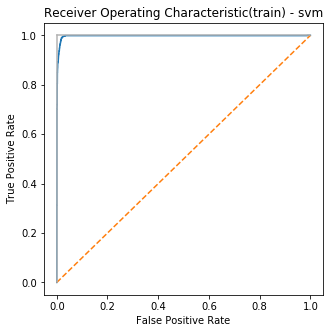

auc_score for svm(test):  0.7938195198285707


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efcdf68348>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(test) - svm')

([<matplotlib.lines.Line2D at 0x1efcdfa9808>],
 [<matplotlib.lines.Line2D at 0x1efcdfa9e48>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

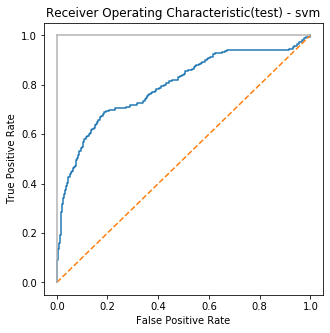

In [55]:
svc_prob=svc.predict_proba(x_train)
svc_prob=svc_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, svc_prob)
print('auc_score for svm(train): ', roc_auc_score(y_train, svc_prob))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - svm')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


svc_prob_test=svc.predict_proba(x_test)
svc_prob_test=svc_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, svc_prob_test)
print('auc_score for svm(test): ', roc_auc_score(y_test, svc_prob_test))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - svm')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# confusion matrix, accuracy and f1 score

In [78]:
print('train model metrics')
confusion_matrix(y_train,svc.predict(x_train))
print('accuracy-',round(svc.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,svc.predict(x_train)))
print('precision-',sk.precision_score(y_train,svc.predict(x_train)))
print('recall-',sk.recall_score(y_train,svc.predict(x_train)))
print(" ")
print('test model metrics')
confusion_matrix(y_test,svc.predict(x_test))
print('accuracy-',round(svc.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,svc.predict(x_test)))
print('precision-',sk.precision_score(y_test,svc.predict(x_test)))
print('recall-',sk.recall_score(y_test,svc.predict(x_test)))


train model metrics


array([[3619,    7],
       [ 183,  738]], dtype=int64)

accuracy- 95.82
f1 score- 0.8859543817527011
precision- 0.9906040268456375
recall- 0.8013029315960912
 
test model metrics


array([[1554,   40],
       [ 234,  122]], dtype=int64)

accuracy- 85.95
f1 score- 0.47104247104247104
precision- 0.7530864197530864
recall- 0.34269662921348315


# Ridge classifier model

In [31]:
#ridge classifier
ridge=RidgeClassifier()
ridge.fit(x_train,y_train)
ridge.predict(x_train)
ridge.predict(x_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# confusion matrix, accuracy and f1 score

In [79]:
print('train model metrics')
confusion_matrix(y_train,ridge.predict(x_train))
print('accuracy-',round(ridge.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,ridge.predict(x_train)))
print('precision-',sk.precision_score(y_train,ridge.predict(x_train)))
print('recall-',sk.recall_score(y_train,ridge.predict(x_train)))
print(" ")
print('test model metrics')
confusion_matrix(y_test,ridge.predict(x_test))
print('accuracy-',round(ridge.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,ridge.predict(x_test)))
print('precision-',sk.precision_score(y_test,ridge.predict(x_test)))
print('recall-',sk.recall_score(y_test,ridge.predict(x_test)))


train model metrics


array([[3529,   97],
       [ 751,  170]], dtype=int64)

accuracy- 81.35
f1 score- 0.28619528619528617
precision- 0.6367041198501873
recall- 0.18458197611292074
 
test model metrics


array([[1555,   39],
       [ 307,   49]], dtype=int64)

accuracy- 82.26
f1 score- 0.2207207207207207
precision- 0.5568181818181818
recall- 0.13764044943820225


# XGBoost model

In [67]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb=xgb.XGBClassifier()
xgboost=GridSearchCV(xgb,params).fit(x_train,y_train)
xgboost.predict(x_train)
xgboost.predict(x_test)


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Plot roc and calculate auc

auc_score for xgboost(train):  0.96704147809313


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efce1cda08>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(train) - xgboost')

([<matplotlib.lines.Line2D at 0x1efce1da608>],
 [<matplotlib.lines.Line2D at 0x1efce1daf48>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

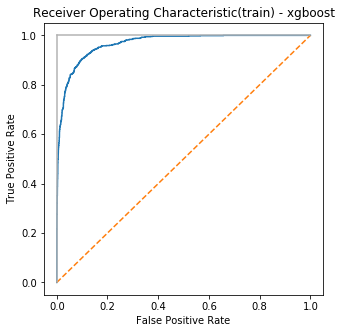

auc_score for xgboost(test):  0.8809616116617088


(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efce1effc8>)

Text(0.5, 1.0, 'Receiver Operating Characteristic(test) - xgboost')

([<matplotlib.lines.Line2D at 0x1efce13b708>],
 [<matplotlib.lines.Line2D at 0x1efce13bec8>])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

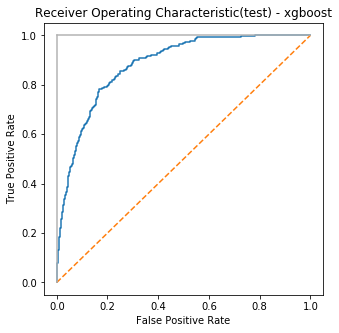

In [68]:
xgb_prob=xgboost.predict_proba(x_train)
xgb_prob=xgb_prob[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_train, xgb_prob)
print('auc_score for xgboost(train): ', roc_auc_score(y_train, xgb_prob))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(train) - xgboost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


xgb_prob_test=xgboost.predict_proba(x_test)
xgb_prob_test=xgb_prob_test[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, xgb_prob_test)
print('auc_score for xgboost(test): ', roc_auc_score(y_test, xgb_prob_test))

# Plot ROC curves
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic(test) - xgboost')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# confusion matrix, accuracy and f1 score

In [80]:
print('train model metrics')
confusion_matrix(y_train,xgboost.predict(x_train))
print('accuracy-',round(xgboost.score(x_train,y_train) * 100, 2))
print('f1 score-',f1_score(y_train,xgboost.predict(x_train)))
print('precision-',sk.precision_score(y_train,xgboost.predict(x_train)))
print('recall-',sk.recall_score(y_train,xgboost.predict(x_train)))
print(" ")
print('test model metrics')
confusion_matrix(y_test,xgboost.predict(x_test))
print('accuracy-',round(xgboost.score(x_test,y_test) * 100, 2))
print('f1 score-',f1_score(y_test,xgboost.predict(x_test)))
print('precision-',sk.precision_score(y_test,xgboost.predict(x_test)))
print('recall-',sk.recall_score(y_test,xgboost.predict(x_test)))

train model metrics


array([[3556,   70],
       [ 300,  621]], dtype=int64)

accuracy- 91.86
f1 score- 0.7704714640198512
precision- 0.8986975397973951
recall- 0.6742671009771987
 
test model metrics


array([[1503,   91],
       [ 188,  168]], dtype=int64)

accuracy- 85.69
f1 score- 0.5463414634146341
precision- 0.6486486486486487
recall- 0.47191011235955055


# Evalutaion table

In [81]:
metrics_list=pd.DataFrame()
metrics_list['model']=['Logistic regression','Random Forest','Decision tree','Support vector Machine','Ridge classifier','XG Boost']
metrics_list['Accuracy(train)']=[81.15,90.21,86.94,95.82,81.35,91.86]
metrics_list['Accuracy(test)']=[82.31,85.59,82.15,85.95,82.26,85.69]
metrics_list['F1 score(train)']=[0.34,0.69,0.66,0.88,0.28,0.77]
metrics_list['F1 score(test)']=[0.30,0.47,0.50,0.47,0.22,0.54]
metrics_list['AUC(train)']=[0.80,0.95,0.91,0.99,'-',0.96]
metrics_list['AUC(test)']=[0.79,0.87,0.80,0.79,'-',0.88]
metrics_list['Precision(train)']=[0.58,0.92,0.69,0.99,0.63,0.89]
metrics_list['Precision(test)']=[0.53,0.7,0.51,0.75,0.55,0.64]
metrics_list['Recall(train)']=[0.24,0.56,0.64,0.80,0.18,0.67]
metrics_list['Recall(test)']=[0.21,0.36,0.5,0.34,0.13,0.47]
metrics_list


,model,Accuracy(train),Accuracy(test),F1 score(train),F1 score(test),AUC(train),AUC(test),Precision(train),Precision(test),Recall(train),Recall(test)
0,Logistic regression,81.15,82.31,0.34,0.30,0.8,0.79,0.58,0.53,0.24,0.21
1,Random Forest,90.21,85.59,0.69,0.47,0.95,0.87,0.92,0.70,0.56,0.36
2,Decision tree,86.94,82.15,0.66,0.50,0.91,0.8,0.69,0.51,0.64,0.50
3,Support vector Machine,95.82,85.95,0.88,0.47,0.99,0.79,0.99,0.75,0.80,0.34
4,Ridge classifier,81.35,82.26,0.28,0.22,-,-,0.63,0.55,0.18,0.13
5,XG Boost,91.86,85.69,0.77,0.54,0.96,0.88,0.89,0.64,0.67,0.47
